In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
start = '2010-01-01'
end = '2024-06-30'
ticker_symbol = 'TSLA'
df = yf.download(ticker_symbol, start=start, end=end)
df = df[['Close']].reset_index(drop=True)

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
def create_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 100
X, y = create_dataset(df_scaled, lookback)

# Reshape data for TCN input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [ ]:
model = Sequential([
    Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(lookback, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 128)           384       
                                                                 
 flatten (Flatten)           (None, 12672)             0         
                                                                 
 dense (Dense)               (None, 64)                811072    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 811521 (3.10 MB)
Trainable params: 811521 (3.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


107/107 [==============================] - 1s 5ms/step
Mean Absolute Percentage Error: 43.14503684009601
Mean Squared Error: 346.46571664428114


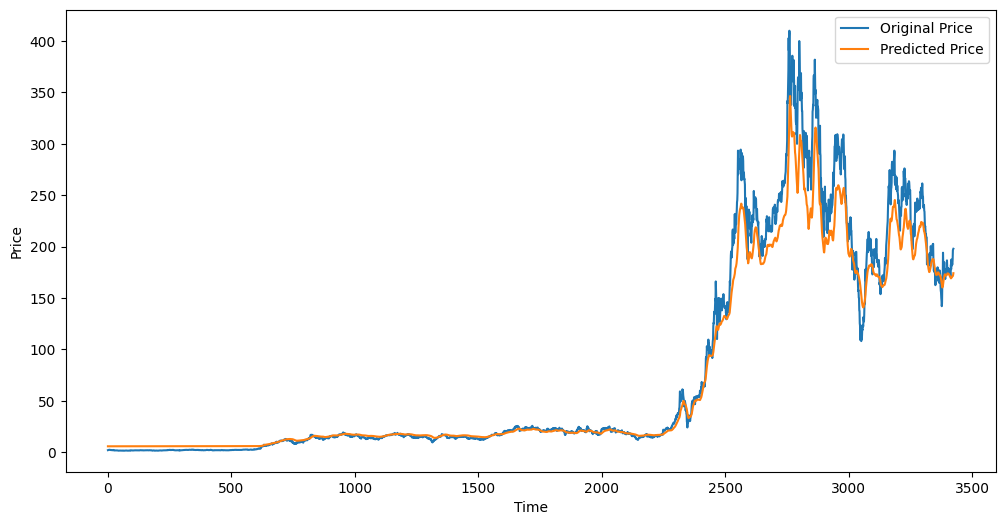

In [ ]:
# Predictions
y_pred = model.predict(X)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

# Calculate Mean Squared Error
mse = np.mean((y_true - y_pred)**2)
print(f'Mean Squared Error: {mse}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Original Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Assuming 'X' and 'y' are your entire dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Make predictions on the test data
y_predicted = model.predict(X_test)

# Inverse transform predictions and actual values
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Assuming 'scaler' is defined earlier

# Calculate Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predicted)
accuracy = 100 - mape


Epoch 1/50
69/69 [==============================] - 4s 63ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 2/50
69/69 [==============================] - 4s 52ms/step - loss: 0.0027 - val_loss: 5.4184e-04
Epoch 3/50
69/69 [==============================] - 2s 35ms/step - loss: 0.0024 - val_loss: 5.4848e-04
Epoch 4/50
69/69 [==============================] - 1s 19ms/step - loss: 0.0028 - val_loss: 4.7486e-04
Epoch 5/50
69/69 [==============================] - 2s 22ms/step - loss: 0.0027 - val_loss: 4.5040e-04
Epoch 6/50
69/69 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 7.9971e-04
Epoch 7/50
69/69 [==============================] - 2s 25ms/step - loss: 0.0026 - val_loss: 7.3280e-04
Epoch 8/50
69/69 [==============================] - 2s 33ms/step - loss: 0.0026 - val_loss: 9.0342e-04
Epoch 9/50
69/69 [==============================] - 2s 33ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 10/50
69/69 [==============================] - 2s 22ms/step - loss: 0.0026 